# Contents


1. Импортируем библиотеки
2. Достаем данные и проводим полный анализ данных
3. Строим и обучаем модели

# Importing libraries

In [1]:
# Устанавливаем необходимые компоненты (если используется conda, то необходимо установить в необходимое окружение данной командой, лучше использовать терминал)
# yfinance
# Для Anaconda(установка через среду Jupyter Notebooks или через терминал conda): pip install yfinance --upgrade --no-cache-dir
# Для Anaconda(если не работает команда выше установка через терминал conda): conda install -c conda-forge yfinance
# Импортируем необходимые библиотеки
import math
import pandas_datareader.data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import tensorflow as tf
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
from tensorflow import keras
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
# Создадим папки для хранения изображений, графиков
import os

path = './Pictures'
path1 = './Graphics/Models'

# check whether directory Pictures already exists
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)
# check whether directory Graphics already exists
if not os.path.exists(path1):
  os.mkdir(path1)
  print("Folder %s created!" % path1)
else:
  print("Folder %s already exists" % path1)

Folder ./Pictures already exists
Folder ./Graphics/Models already exists


In [3]:
# Список компаний
company1='AAPL'
company2='GOOG'
company3='MSFT'
company4='AMZN'
# Названия компаний для визуализации на графиках
title_company1='APPLE'
title_company2='GOOGLE'
title_company3='MICROSOFT'
title_company4='AMAZON'
# Данные для анализа акций
data_analysis='Adj Close'
# Данные для обучения моделей
data_train='Close'
# Начало анализа данных акций
date_start='2012-01-01'#datetime(end.year - 1, end.month, end.day)
# Данные для показания на графике
# Валюта для представления на графиках
price_graf_title='$'
# Данные для показания на графике
data_graf_title=data_train

In [4]:
yf.pdr_override() # для загрузки данных
# Список компаний для которых мы будем получать биржевые данные с yahoo https://finance.yahoo.com/trending-tickers
Tech_list = [company1, company2, company3, company4]
# Теперь мы устанавливаем время окончания и начала сбора данных
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
# Теперь мы используем цикл for для захвата данных yahoo и настройки его в виде фрейма данных
for stock in Tech_list:
    globals()[stock] = pdr.DataReader(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Финансовая отчетность для компании №1
company_in_list1_ticker = yf.Ticker(company1)
company_in_list1_ticker.get_financials()

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147192,0.162045,0.133023,0.144282
NormalizedEBITDA,125820000000.0,130541000000.0,120233000000.0,77344000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,125820000000.0,130541000000.0,120233000000.0,77344000000.0
EBIT,114301000000.0,119437000000.0,108949000000.0,66288000000.0
NetInterestIncome,NaN,-106000000.0,198000000.0,890000000.0
InterestExpense,NaN,2931000000.0,2645000000.0,2873000000.0


In [6]:
# Финансовая отчетность для компании №2
company_in_list2_ticker = yf.Ticker(company2)
company_in_list2_ticker.get_financials()

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
TaxEffectOfUnusualItems,0.0,0.0,0.0,-220610000.0
TaxRateForCalcs,0.159208,0.162023,0.162493,0.13
NormalizedEBITDA,90770000000.0,91155000000.0,54921000000.0,49406000000.0
TotalUnusualItems,-6173000000.0,12030000000.0,0.0,-1697000000.0
TotalUnusualItemsExcludingGoodwill,-6173000000.0,12030000000.0,0.0,-1697000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,59972000000.0,76033000000.0,40269000000.0,34343000000.0
ReconciledDepreciation,15928000000.0,12441000000.0,13697000000.0,11781000000.0
ReconciledCostOfRevenue,126203000000.0,110939000000.0,84732000000.0,71896000000.0
EBITDA,90770000000.0,91155000000.0,54921000000.0,47709000000.0
EBIT,74842000000.0,78714000000.0,41224000000.0,35928000000.0


In [7]:
# Финансовая отчетность для компании №3
company_in_list3_ticker = yf.Ticker(company3)
company_in_list3_ticker.get_financials()

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.189786,0.131134,0.138266,0.16
NormalizedEBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
TotalUnusualItems,-15000000.0,334000000.0,1303000000.0,28000000.0
TotalUnusualItemsExcludingGoodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
ReconciledDepreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
ReconciledCostOfRevenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
EBIT,88523000000.0,83383000000.0,69916000000.0,52959000000.0


In [8]:
# Финансовая отчетность для компании №4
company_in_list4_ticker = yf.Ticker(company4)
company_in_list4_ticker.get_financials()

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.21,0.12558,0.118413,0.169863
NormalizedEBITDA,38352000000.0,74256000000.0,51076000000.0,37365000000.0
TotalUnusualItems,-16266000000.0,14652000000.0,NaN,203000000.0
TotalUnusualItemsExcludingGoodwill,-16266000000.0,14652000000.0,NaN,203000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,-2722000000.0,33364000000.0,21331000000.0,11588000000.0
ReconciledDepreciation,41921000000.0,34296000000.0,25251000000.0,21789000000.0
ReconciledCostOfRevenue,446343000000.0,403507000000.0,334564000000.0,241699000000.0
EBITDA,38352000000.0,74256000000.0,51076000000.0,37365000000.0
EBIT,-3569000000.0,39960000000.0,25825000000.0,15576000000.0


# Reading dataset

**1. Как изменилась цена акций?**

In [9]:
# Список компаний. Данные взяты с yahoo https://finance.yahoo.com/trending-tickers/
# AAPL - эпл
# GOOG - гугл
# MSFT - майкрософт
# AMZN - амазон
company_in_list1 = globals()[company1]
company_in_list2 = globals()[company2]
company_in_list3 = globals()[company3]
company_in_list4 = globals()[company4]
Company_list = [company_in_list1, company_in_list2, company_in_list3, company_in_list4]
company_name = [company1, company2, company3, company4]
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name

df = pd.concat(Company_list,axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMZN
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMZN
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMZN
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMZN
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMZN
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMZN
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMZN
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMZN
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMZN


In [10]:
# Описательная статистика для компании №1 - AAPL
company_in_list1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,166.086588,167.760318,164.700714,166.331131,165.810092,6.237921e+07
std,18.410900,18.251358,18.569426,18.392493,18.539791,1.855414e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,3.145820e+07
25%,150.189999,152.482498,149.017502,150.974995,150.180573,4.989202e+07
50%,171.154999,173.105003,170.470001,171.805000,171.242851,5.811600e+07
75%,179.540005,180.772499,177.585003,179.385002,179.107403,6.951238e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [11]:
# Информация о данных
company_in_list1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-11-16 to 2023-11-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


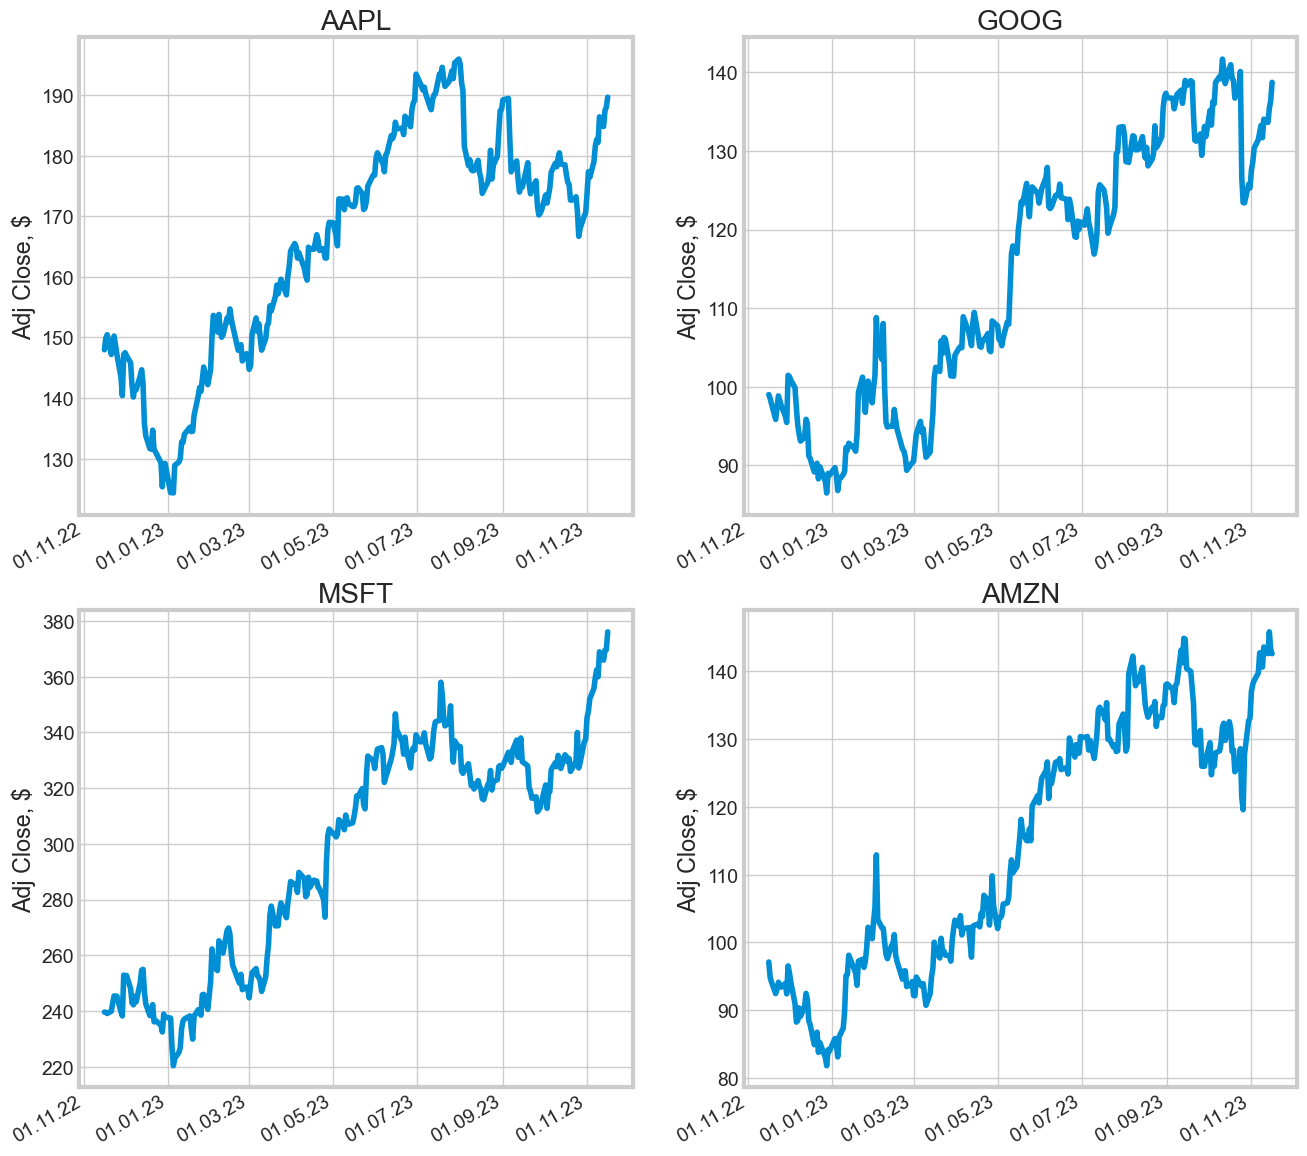

In [12]:
# Показываем графики цен закрытия
plt.figure(figsize=(14, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
# Отмасштабируем график, чтобы в окно уместились повернутые надписи
plt.tight_layout()
for i, company in enumerate(Company_list, 1):
    axes=plt.subplot(2, 2, i)
    # Изменим формат календарных данных
    axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))
    company[data_analysis].plot()
    plt.ylabel(data_analysis + ', ' + price_graf_title)
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")
plt.savefig("Graphics/Price_our_stocks.png", bbox_inches ="tight")
plt.show()

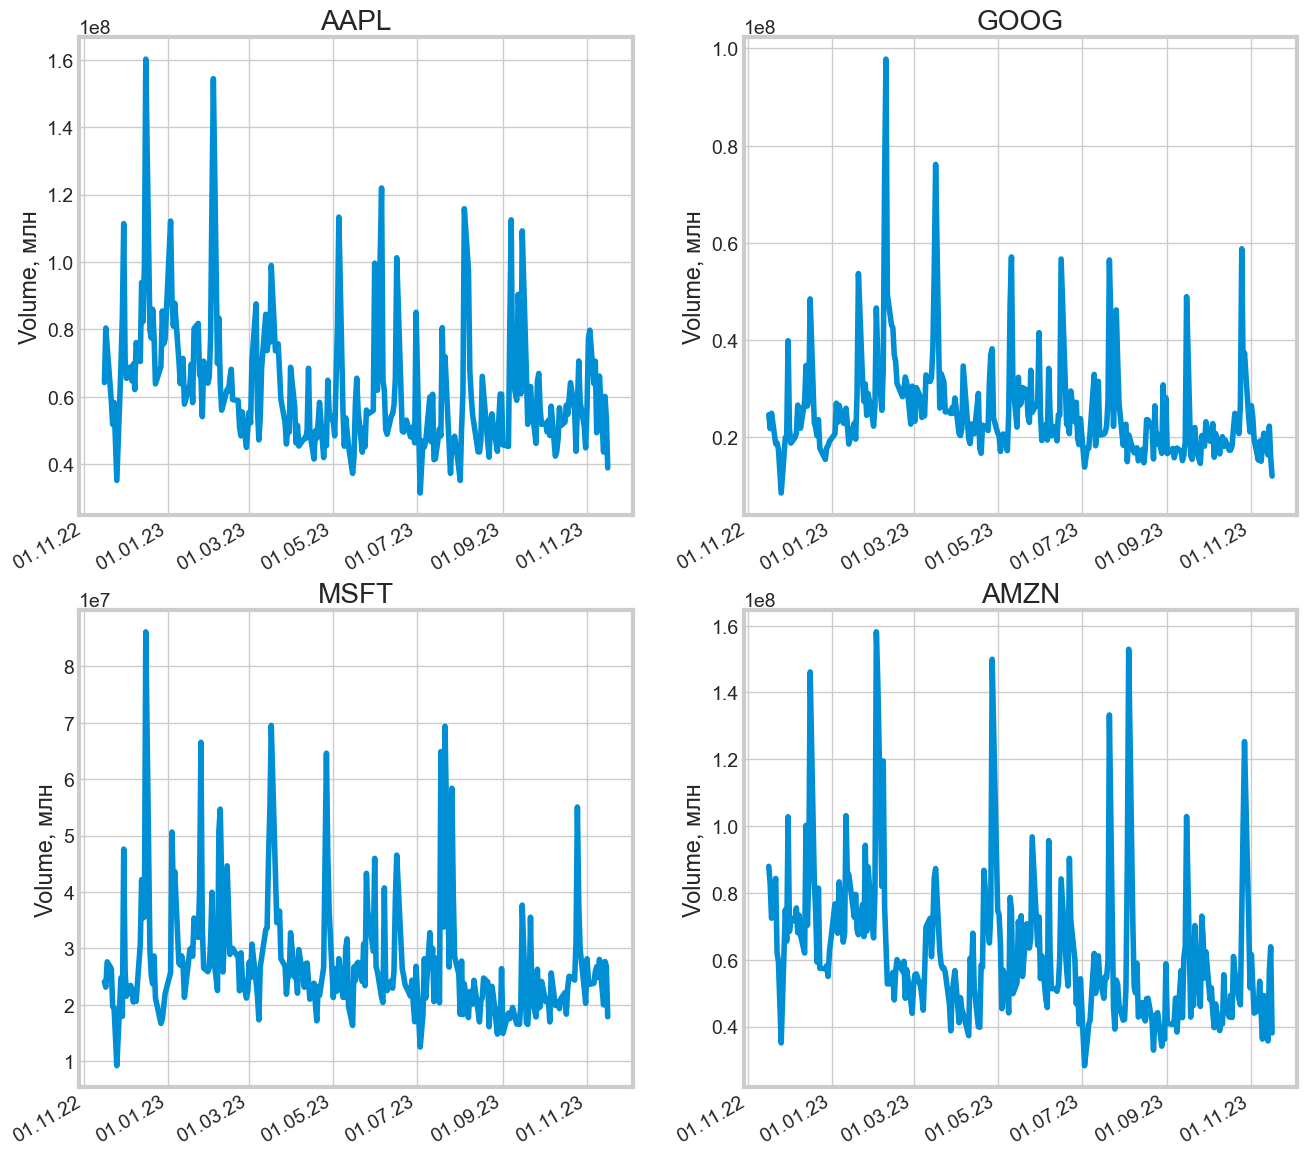

In [13]:
# Здесь мы визуализируем общий объем акций, торгуемых каждый день
plt.figure(figsize=(14, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
# Отмасштабируем график, чтобы в окно уместились повернутые надписи
plt.tight_layout()
for i, company in enumerate(Company_list, 1):
    axes=plt.subplot(2, 2,i)
    # Изменим формат календарных данных
    axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))
    company['Volume'].plot()
    plt.ylabel('Volume, млн')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")
plt.savefig("Graphics/Volume_our_stocks.png", bbox_inches ="tight")
plt.show()

Теперь, когда мы увидели визуализацию цены закрытия и объема торгов на каждый день, давайте продолжим и рассчитаем скользящую среднюю для акций.

**2. Какова скользящая средняя по различным акциям?**

Есть три важных скользящих средних, которые могут быть применены к нашим графикам, которые помогут лучше торговать. Это 10 скользящих средних, 20 скользящих средних и 50 скользящих средних.





1. Скользящая средняя 20 (10 МА)-это краткосрочная перспектива.
1. Скользящая средняя 50 (20 МА) - это среднесрочная перспектива.
1. Скользящая средняя 200 (50 МА) - это смещение тренда.

In [14]:
# Скользящие средние
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company[data_analysis].rolling(ma).mean()

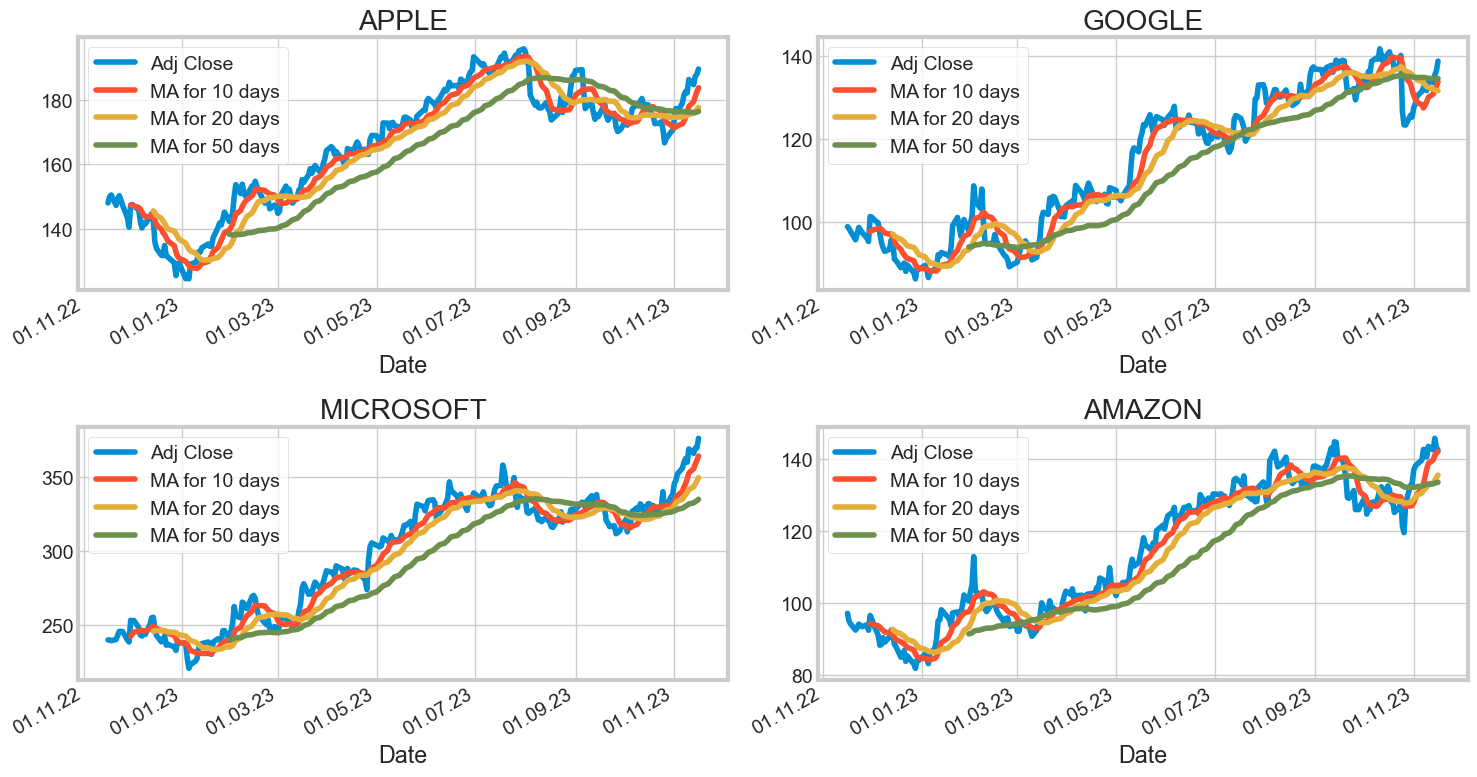

In [15]:
# Здесь мы визуализируем три важные скользящие средние всей компании
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

company_in_list1[[data_analysis, 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(title_company1)
axes[0,0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list2[[data_analysis, 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(title_company2)
axes[0,1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list3[[data_analysis, 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(title_company3)
axes[1,0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list4[[data_analysis, 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(title_company4)
axes[1,1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

fig.tight_layout()
plt.savefig("Graphics/MA_our_stocks.png", bbox_inches ="tight")
plt.show()

  **3. Какова была дневная доходность акций в среднем?**

Теперь, когда мы провели некоторый базовый анализ, продолжим и погрузимся немного глубже. Теперь мы проанализируем риск акций. Для этого нам нужно будет более внимательно изучить ежедневные изменения акций, а не только их абсолютную стоимость. Продолжим и используем пандас для получения ежедневной прибыли на акции Apple.

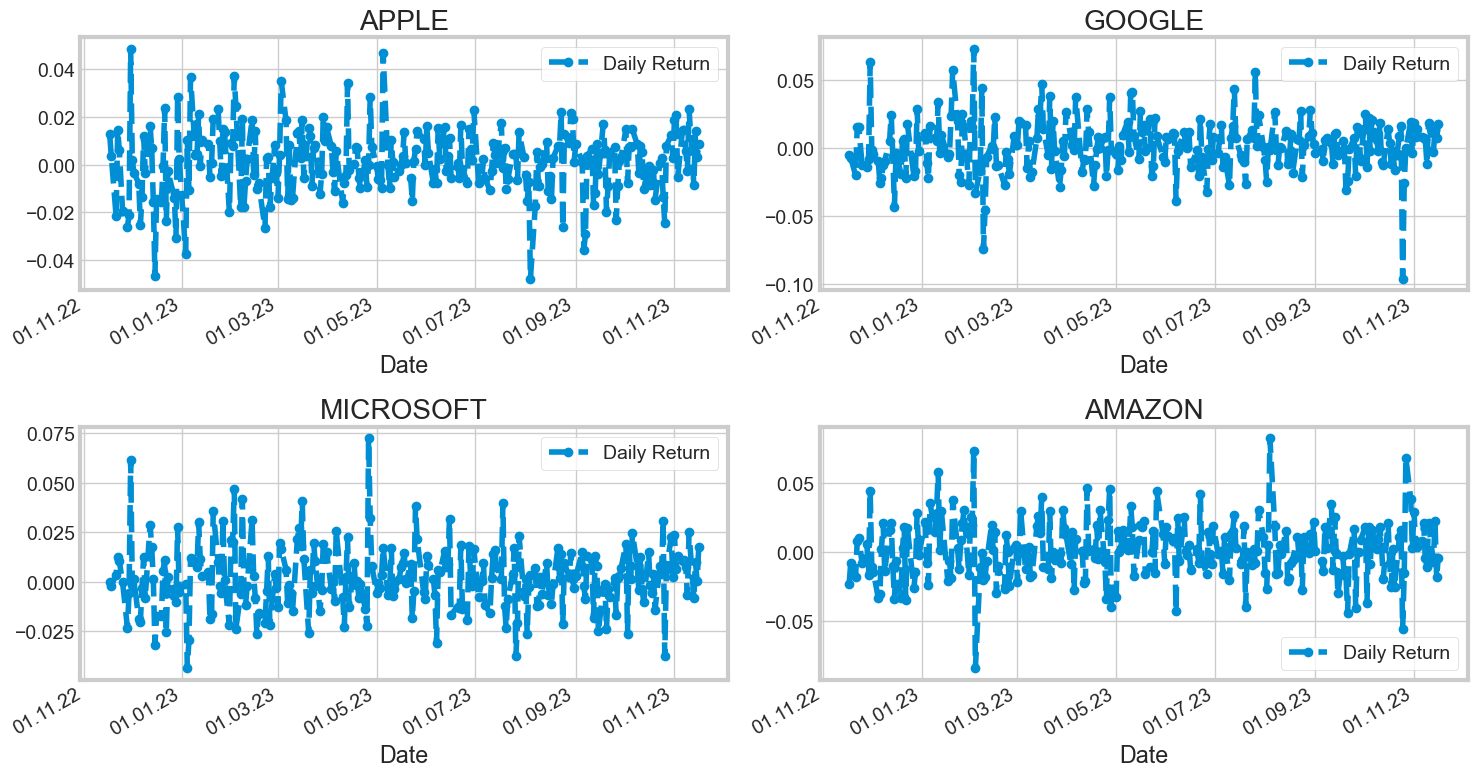

In [16]:
# Мы будем использовать pct_change, чтобы найти процентное изменение за каждый день
for company in Company_list:
    company['Daily Return'] = company[data_analysis].pct_change()

# Затем мы построим график процента ежедневной доходности
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

company_in_list1['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(title_company1)
axes[0,0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list2['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(title_company2)
axes[0,1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list3['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(title_company3)
axes[1,0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

company_in_list4['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(title_company4)
axes[1,1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m.%y"))

fig.tight_layout()
plt.savefig("Graphics/Daily_Return_our_stocks.png", bbox_inches ="tight")
plt.show()

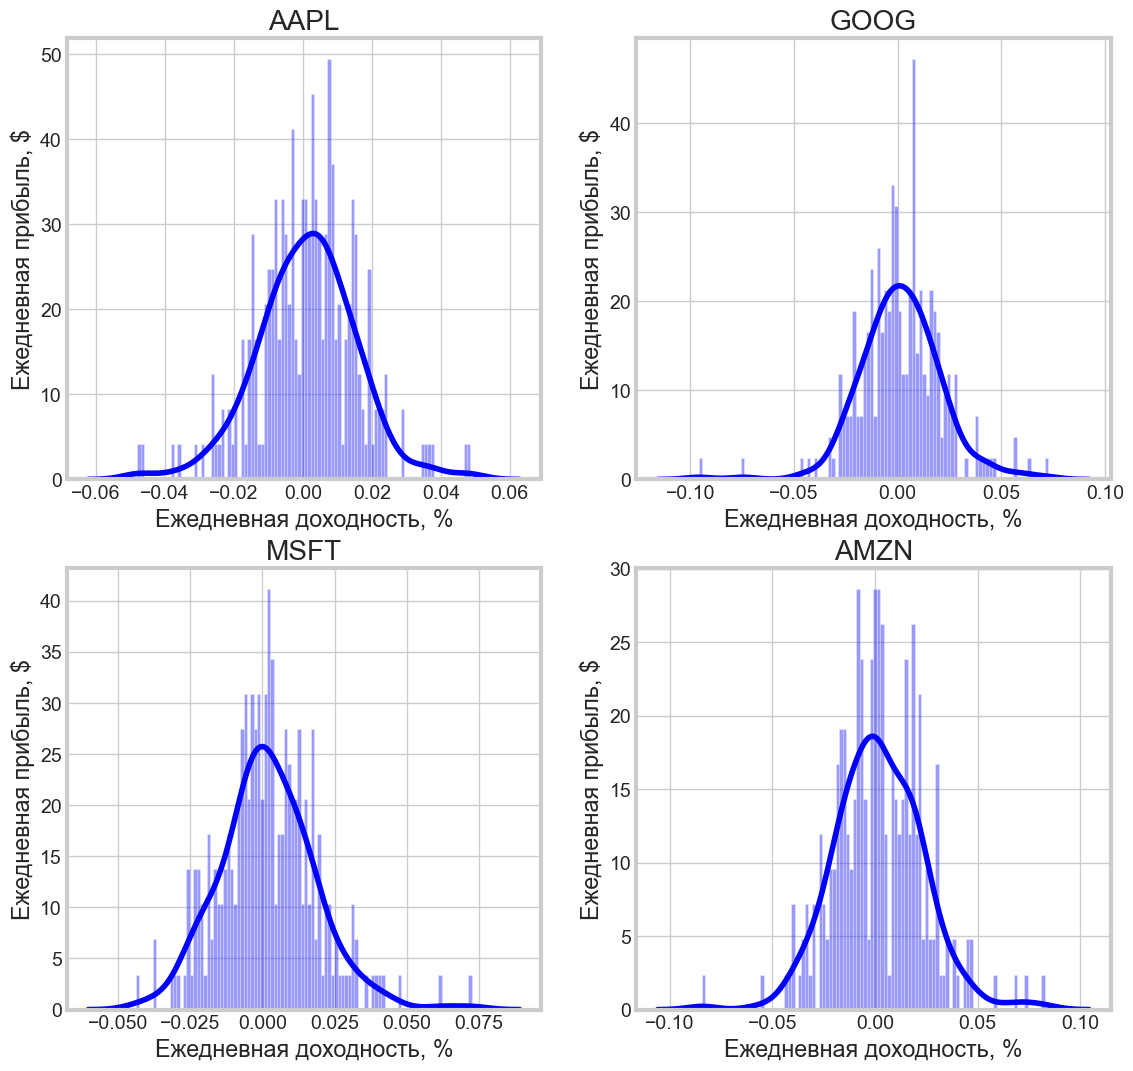

In [17]:
# Используем dropna(), иначе значения NaN не могут быть прочитаны библиотекой seaborn
plt.figure(figsize=(12, 12))
# Если появляются не нужные предупреждения, то нужно включить
import warnings
warnings.filterwarnings("ignore")
for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Ежедневная прибыль' + ', ' + price_graf_title)
    plt.xlabel('Ежедневная доходность, %')
    plt.title(f'{company_name[i - 1]}')
plt.savefig("Graphics/Daily_Return_in%_our_stocks.png", bbox_inches ="tight")
plt.show()

**4. Какова корреляция между ценами закрытия различных акций?**

In [18]:
# Здесь мы собираем все цены закрытия для списка технических акций в один фрейм данных
closing_df = pdr.DataReader(Tech_list, start, end)[data_analysis]
# Здесь мы печатаем первые пять строк
closing_df.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-16,147.962952,97.120003,98.989998,239.605438
2022-11-17,149.882233,94.849998,98.500000,239.555878
2022-11-18,150.449066,94.139999,97.800003,239.099915
2022-11-21,147.187302,92.459999,95.830002,239.922638
2022-11-22,149.345215,93.199997,97.330002,242.876434


In [19]:
# Здесь мы создаем новый фрейм данных о возвратах технологий
tech_rets = closing_df.pct_change() # Рассчитаем процентное изменение в Pandas
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-16,NaN,NaN,NaN,NaN
2022-11-17,0.012971,-0.023373,-0.004950,-0.000207
2022-11-18,0.003782,-0.007485,-0.007107,-0.001903
2022-11-21,-0.021680,-0.017846,-0.020143,0.003441
2022-11-22,0.014661,0.008003,0.015653,0.012311


Итак, теперь мы можем видеть, что если две акции идеально (и позитивно) коррелируют друг с другом, должна возникнуть линейная зависимость между их ежедневными значениями доходности.

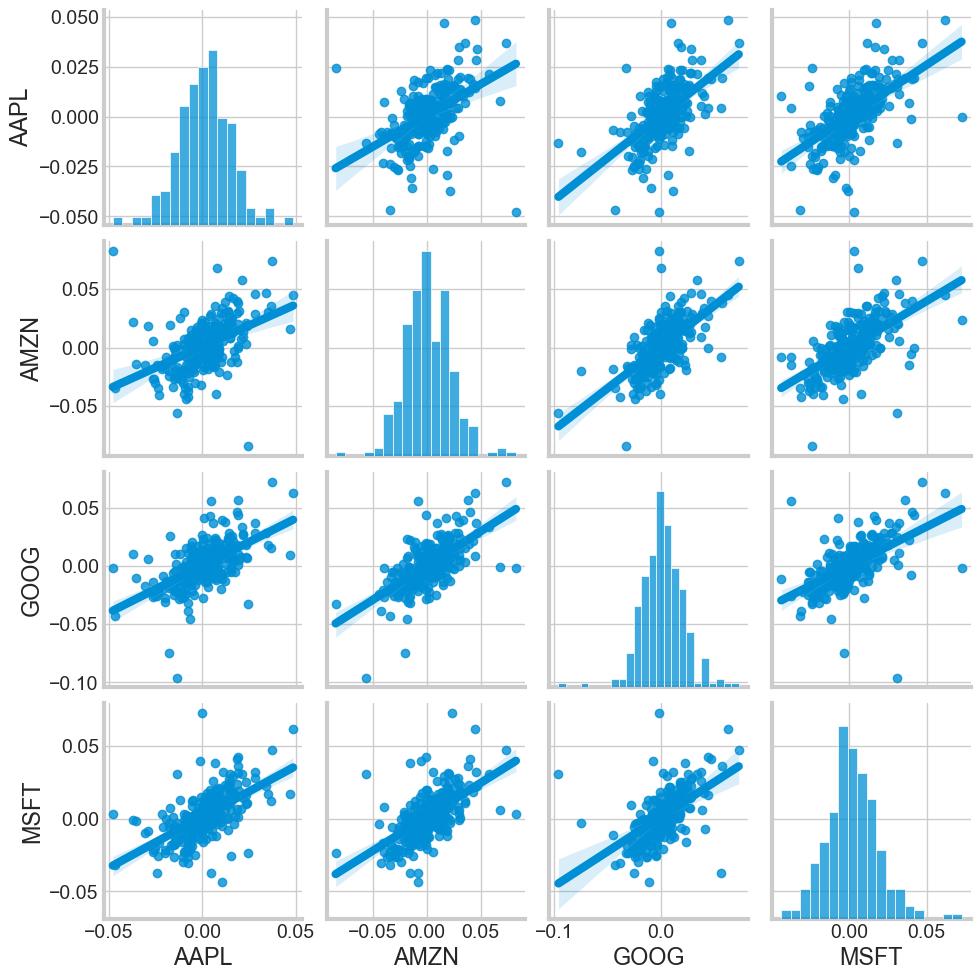

In [20]:
# Здесь мы просто вызываем pairplot в нашем фрейме данных для автоматического визуального анализа
sns.pairplot(tech_rets, kind='reg')
plt.savefig("Graphics/Correlation_our_stocks.png", bbox_inches ="tight")
plt.show()

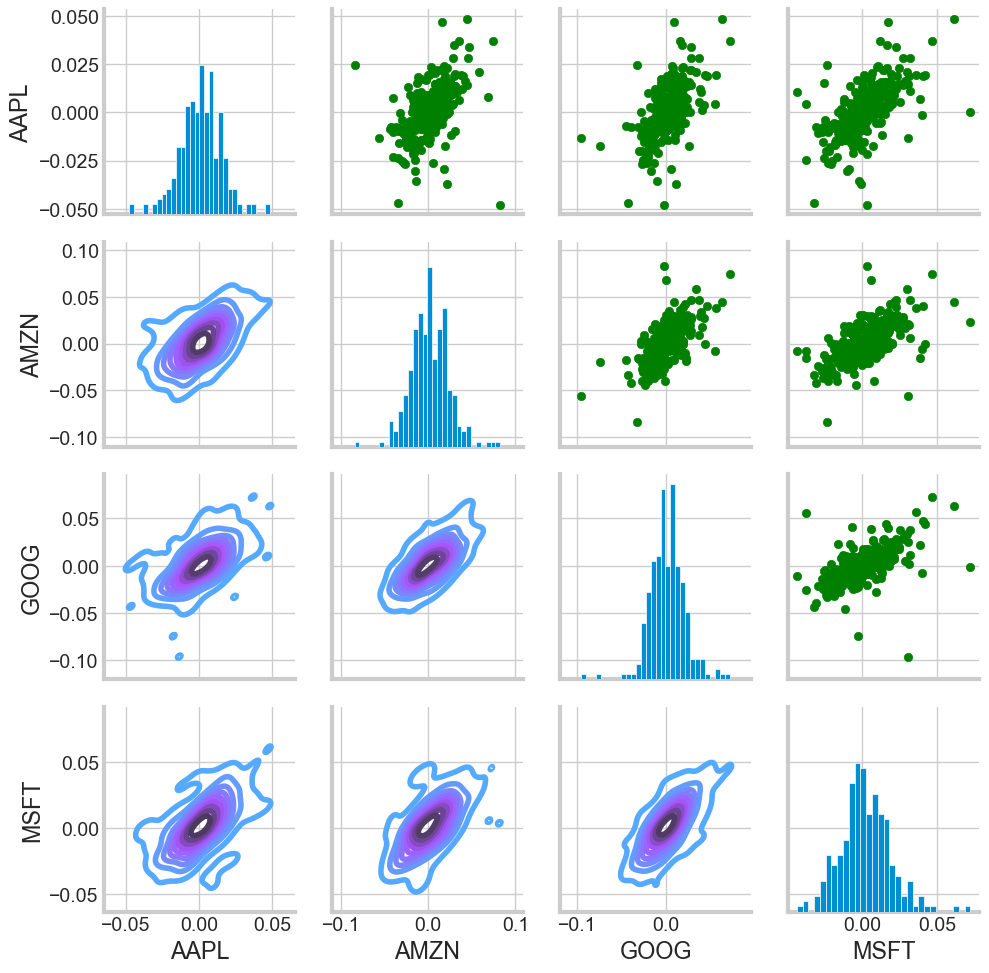

In [21]:
# Настроим фигуру, назвав ее returns_fig
return_fig = sns.PairGrid(tech_rets.dropna())

# Используя map_upper, мы можем указать, как будет выглядеть верхний треугольник.
return_fig.map_upper(plt.scatter, color='green')

# Мы также можем определить нижний треугольник на рисунке, включая тип графика (kde)
# или цветовая карта (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Наконец, мы определим диагональ как серию графиков гистограммы дневной доходности
return_fig.map_diag(plt.hist, bins=30)
plt.savefig("Graphics/Correlation_figure_our_stocks.png", bbox_inches ="tight")
plt.show()

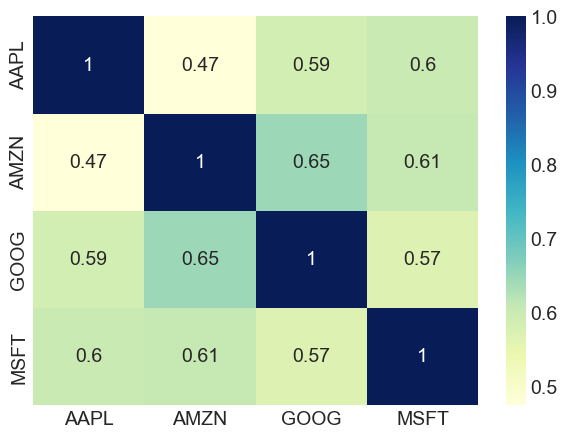

In [22]:
# Здесь мы используем seabron для быстрого корреляционного графика для ежедневной доходности (в %)
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")
plt.savefig("Graphics/Correlation_graf1_our_stocks.png", bbox_inches ="tight")
plt.show()

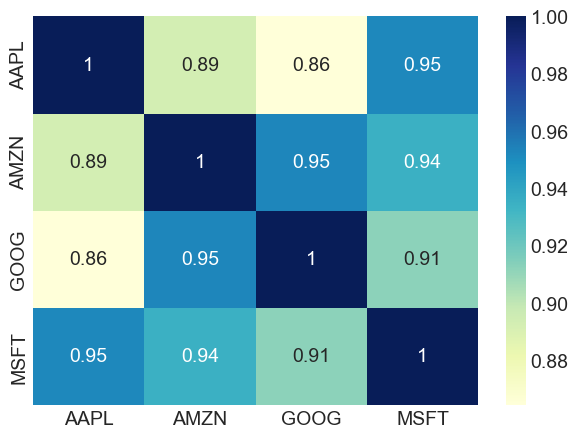

In [23]:
# Здесь мы используем seabron для быстрого корреляционного графика для ежедневной доходности (в денежных единицах)
sns.heatmap(closing_df.corr(), annot=True, cmap="YlGnBu")
plt.savefig("Graphics/Correlation_graf2_our_stocks.png", bbox_inches ="tight")
plt.show()

Точно так же, как мы подозревали в нашем парном графике, мы видим здесь численно и визуально, что у Microsoft и Apple была самая сильная корреляция ежедневной доходности акций. Также интересно видеть, что все технологические компании положительно коррелируют.

**5.Какие риски инвестируя в конкретную акцию?**

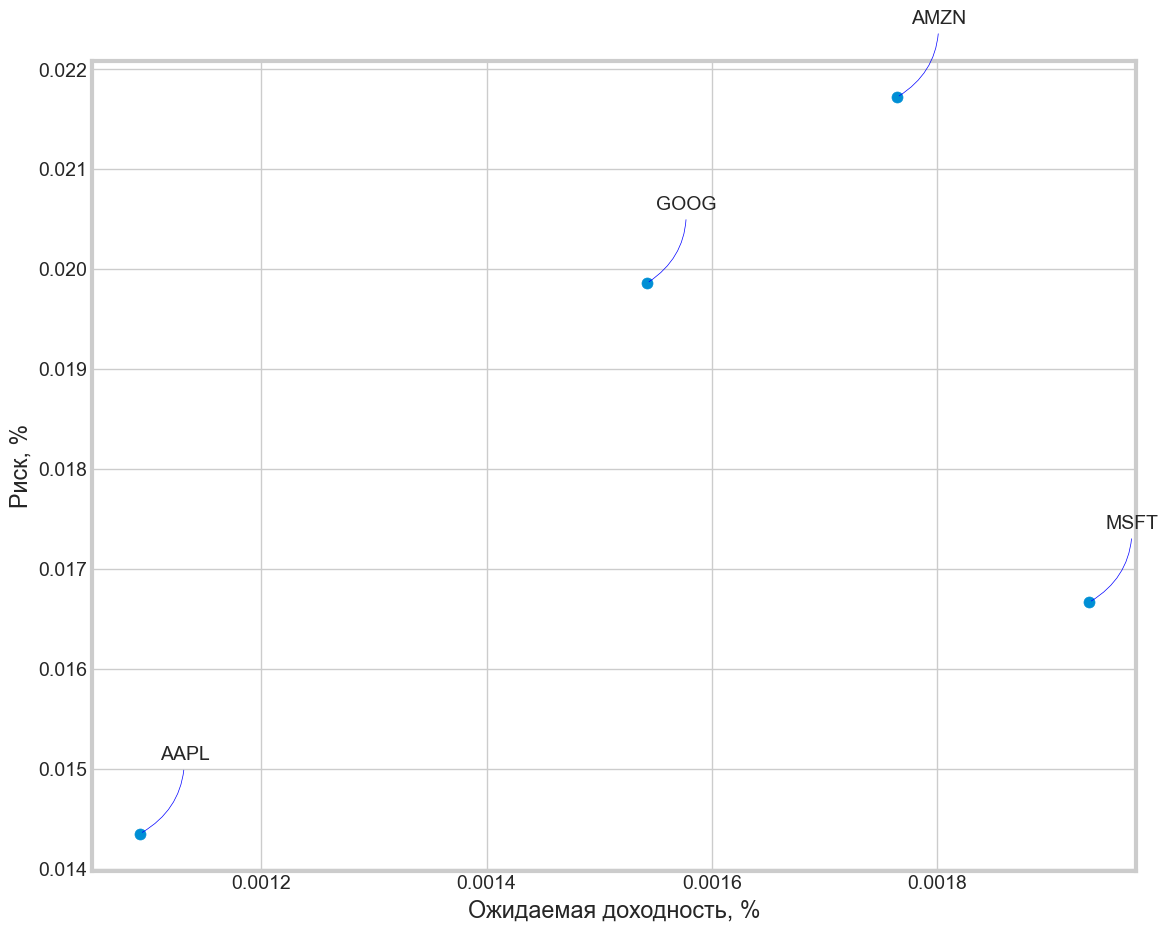

In [24]:
# Здесь мы определяем новый фрейм данных как очищенную версию фрейма данных original tech_rets
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Ожидаемая доходность, %')
plt.ylabel('Риск, %')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.savefig("Graphics/Risk_our_stocks.png", bbox_inches ="tight")
plt.show()

# Строим и обучаем модели

**6. Прогнозирование цены закрытия цена акций 1 компании - APPLE inc:**

In [25]:
# Здесь мы получаем котировку акций
df = pdr.DataReader(company1, start=date_start, end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449693,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516599,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655554,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767572,394024400
...,...,...,...,...,...,...
2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400


In [26]:
# Размерность
df.shape

(2989, 6)

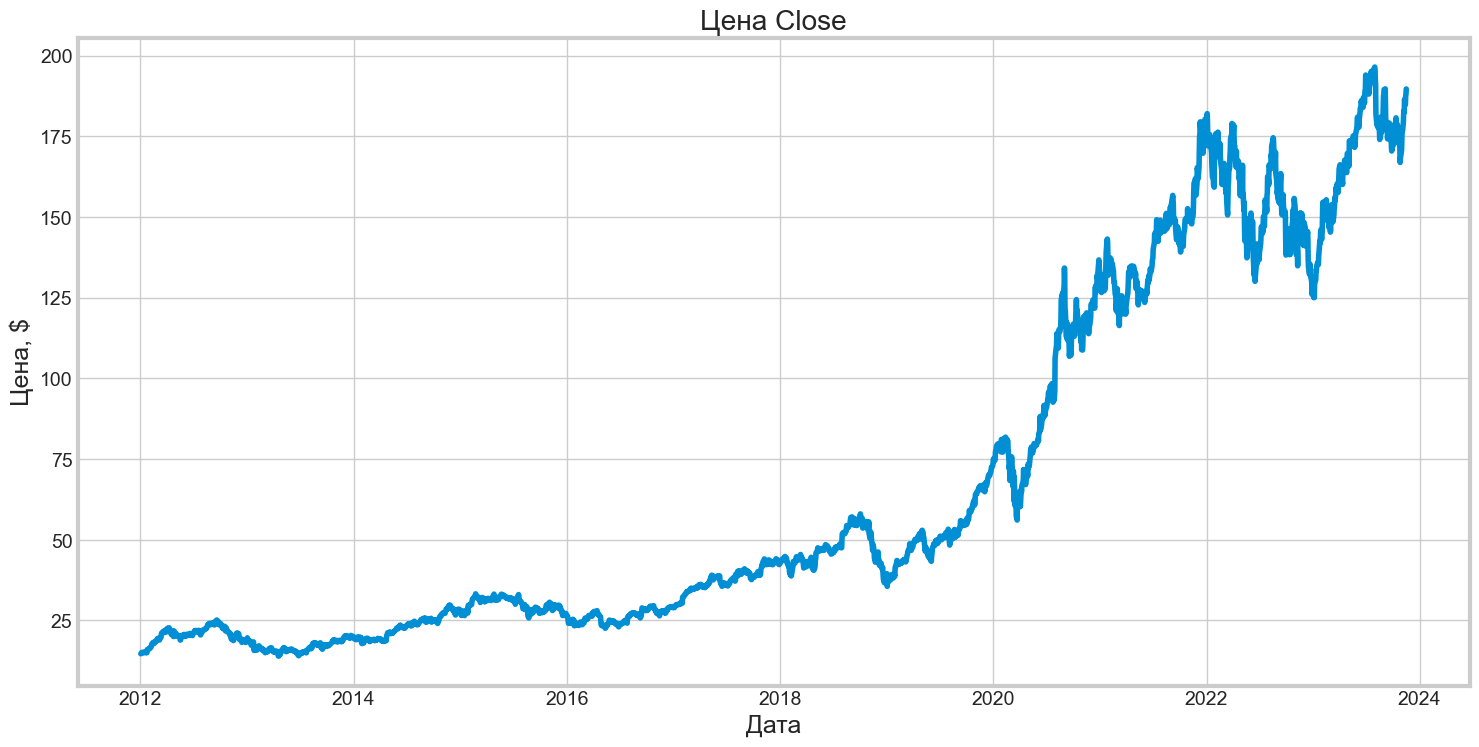

In [27]:
# Здесь мы визуализируем историю цен закрытия
plt.figure(figsize=(16,8))
plt.title('Цена' + ' ' + data_graf_title)
plt.plot(df[data_train])
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.savefig("Graphics/Price_our_stock_company1.png", bbox_inches ="tight")
plt.show()

Создаем новый дата фрейм только с ценой закрытия и преобразуйте его в массив.
Затем создаем переменную для хранения длины набора обучающих данных. В моем случае, набор обучающих данных содержит около 80% всех данных. И 20 процентов это тестовая выборка.

In [28]:
# Создаем датафрейм только со столбцом 'Close'
data = df.filter([data_train])
# Преобразование фрейма данных в массив numpy
dataset = data.values
# Делим выборку на тест и обучение
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

2392

In [29]:
# Создание набора обучающих данных
train_data = dataset[0:training_data_len  , : ]
# Создаем x_train и y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([14.6867857 , 14.76571369, 14.92964268, 15.08571434, 15.0617857 ,
       15.11571407, 15.09107113, 15.04964256, 14.99321365, 15.16785717,
       15.32535744, 15.27678585, 15.01071358, 15.26464272, 15.01464272,
       15.95214272, 15.87964344, 15.97428608, 16.17892838, 16.30285645,
       16.29249954, 16.25428581, 16.41714287, 16.57035637, 16.74392891,
       17.02428627, 17.61321449, 17.62214279, 17.95000076, 18.19499969,
       17.7739296 , 17.9360714 , 17.93285751, 18.38750076, 18.3228569 ,
       18.44249916, 18.65749931, 18.77714348, 19.12178612, 19.37285614,
       19.44535637, 19.47071457, 19.04142952, 18.93785667, 18.95321465,
       19.35678673, 19.47035789, 19.7142868 , 20.28928566, 21.05642891,
       20.91285706, 20.91321373, 21.46785736, 21.6414299 , 21.5178566 ,
       21.40500069, 21.28750038, 21.67785645, 21.94571495, 22.05785751])]
[21.78071403503418]

[array([14.6867857 , 14.76571369, 14.92964268, 15.08571434, 15.0617857 ,
       15.11571407, 15.09107113, 15.049

In [30]:
# Здесь мы преобразуем x_train и y_train в массивы numpy для быстроты работы модели
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
# Выведем размерность наших тренировочных данных
print("Train data shapes:", x_train.shape, y_train.shape)

Train data shapes: (2332, 60) (2332,)


# Bagging

In [32]:
from sklearn.ensemble import BaggingRegressor

model0 = BaggingRegressor(n_estimators = 100) # базовый оценщик - DecisionTreeRegressor.

model0.fit(x_train, y_train)

BaggingRegressor(n_estimators=100)

In [33]:
# Создаем тестовые данные
test_data = dataset[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [34]:
# Здесь мы преобразуем x_test в массив numpy
x_test = np.array(x_test)

In [35]:
# Теперь мы получаем прогнозируемые модели ценовых значений
predictions = model0.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для BaggingRegressor {rmse}")

RMSE для BaggingRegressor 26.626470368924718


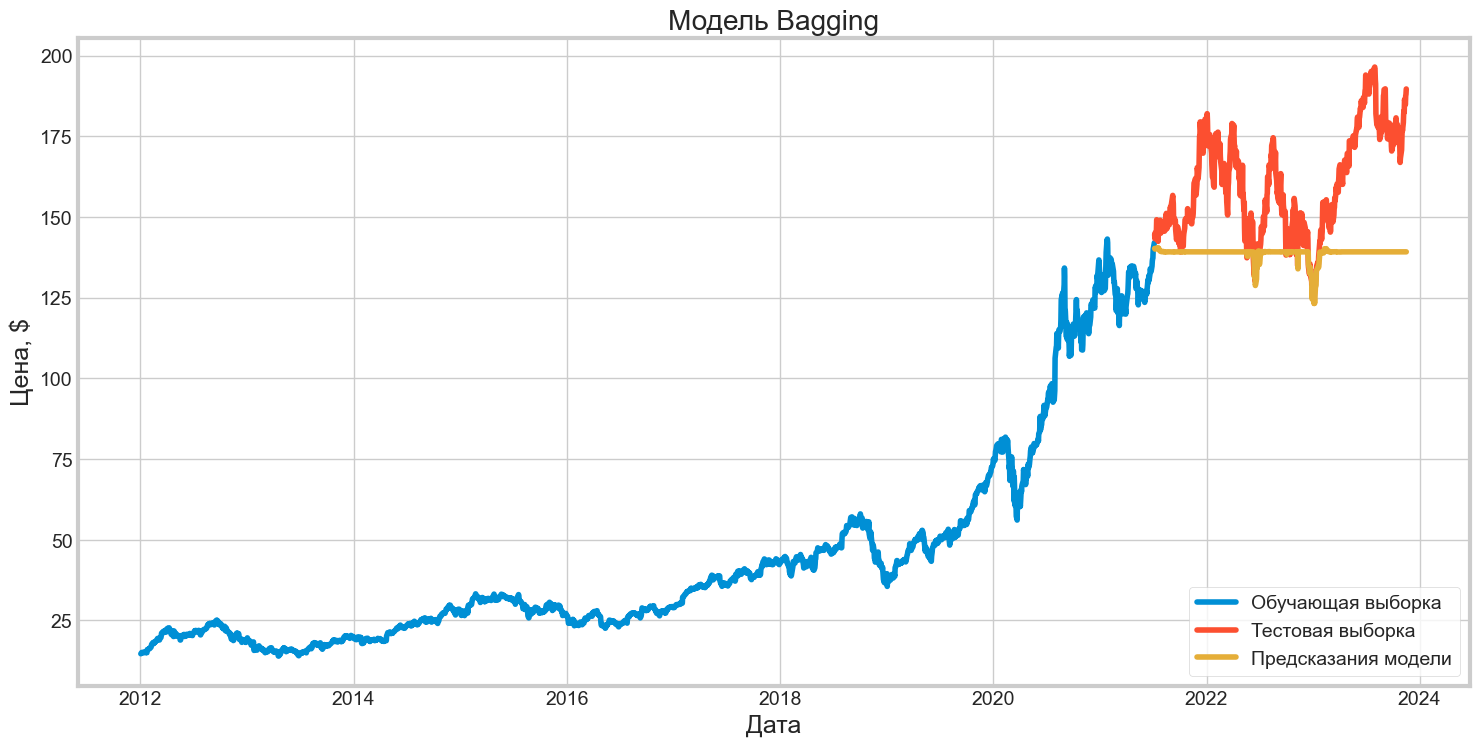

In [36]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Bagging')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Bagging_model_1.png", bbox_inches ="tight")
plt.show()

In [37]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,140.246304
2021-07-08,143.240005,140.081703
2021-07-09,145.110001,140.049103
2021-07-12,144.500000,140.151203
2021-07-13,145.639999,140.229503
...,...,...
2023-11-10,186.399994,139.198501
2023-11-13,184.800003,139.198501
2023-11-14,187.440002,139.198501


# Bagging linear

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

model_linear = BaggingRegressor(LinearRegression(), n_estimators = 100)

model_linear.fit(x_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=100)

In [39]:
# Теперь мы получаем прогнозируемые модели ценовых значений
predictions = model_linear.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для BaggingRegressor {rmse}")

RMSE для BaggingRegressor 22.581696966167932


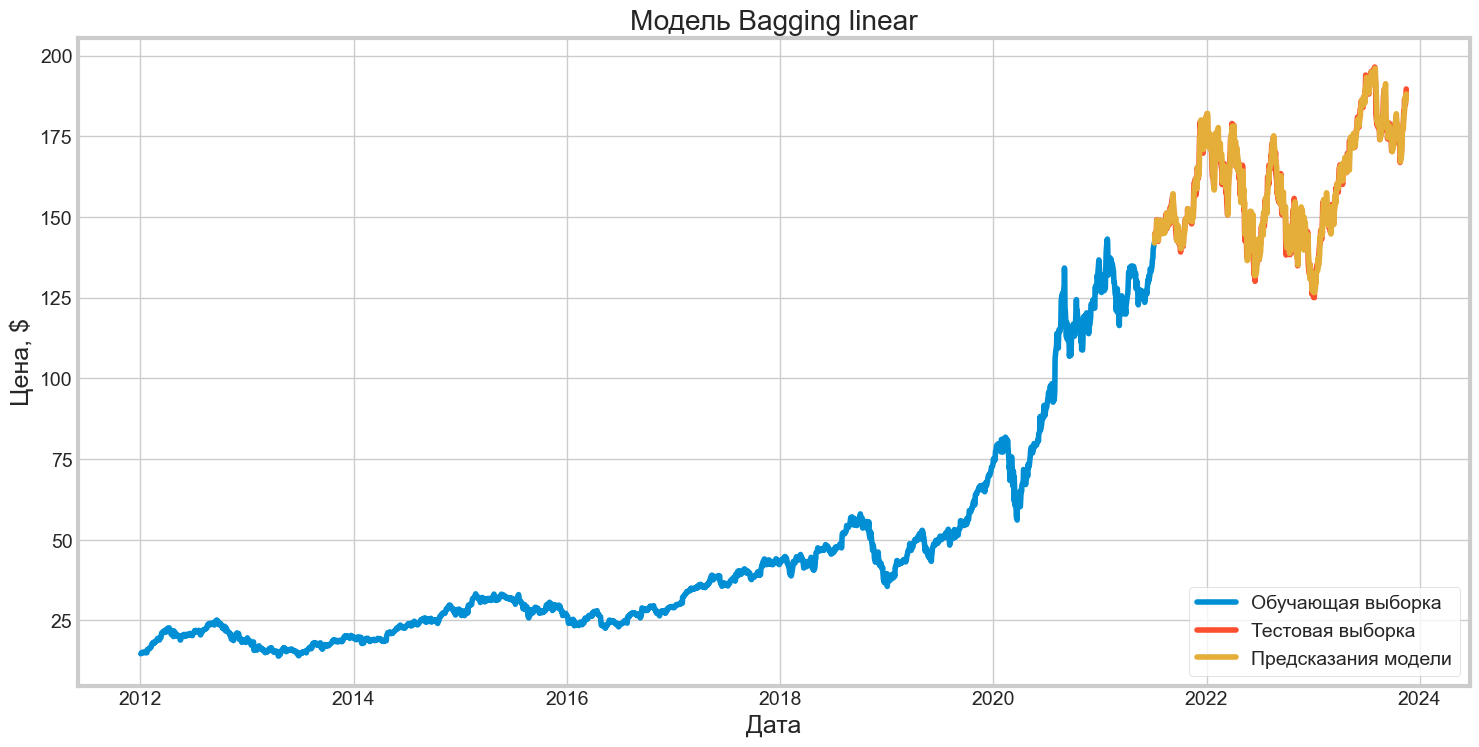

In [40]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Bagging linear')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Bagging_model_2.png", bbox_inches ="tight")
plt.show()

In [41]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,141.912972
2021-07-08,143.240005,144.654883
2021-07-09,145.110001,144.007096
2021-07-12,144.500000,145.564045
2021-07-13,145.639999,144.535205
...,...,...
2023-11-10,186.399994,183.007392
2023-11-13,184.800003,187.270343
2023-11-14,187.440002,185.689627


# Bagging kneighbors

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

model_kneighbors = BaggingRegressor(KNeighborsRegressor(), n_estimators = 100)

model_kneighbors.fit(x_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=100)

In [43]:
# Теперь мы получаем прогнозируемые модели ценовых значений
predictions = model_kneighbors.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для BaggingRegressor {rmse}")

RMSE для BaggingRegressor 37.72855145495098


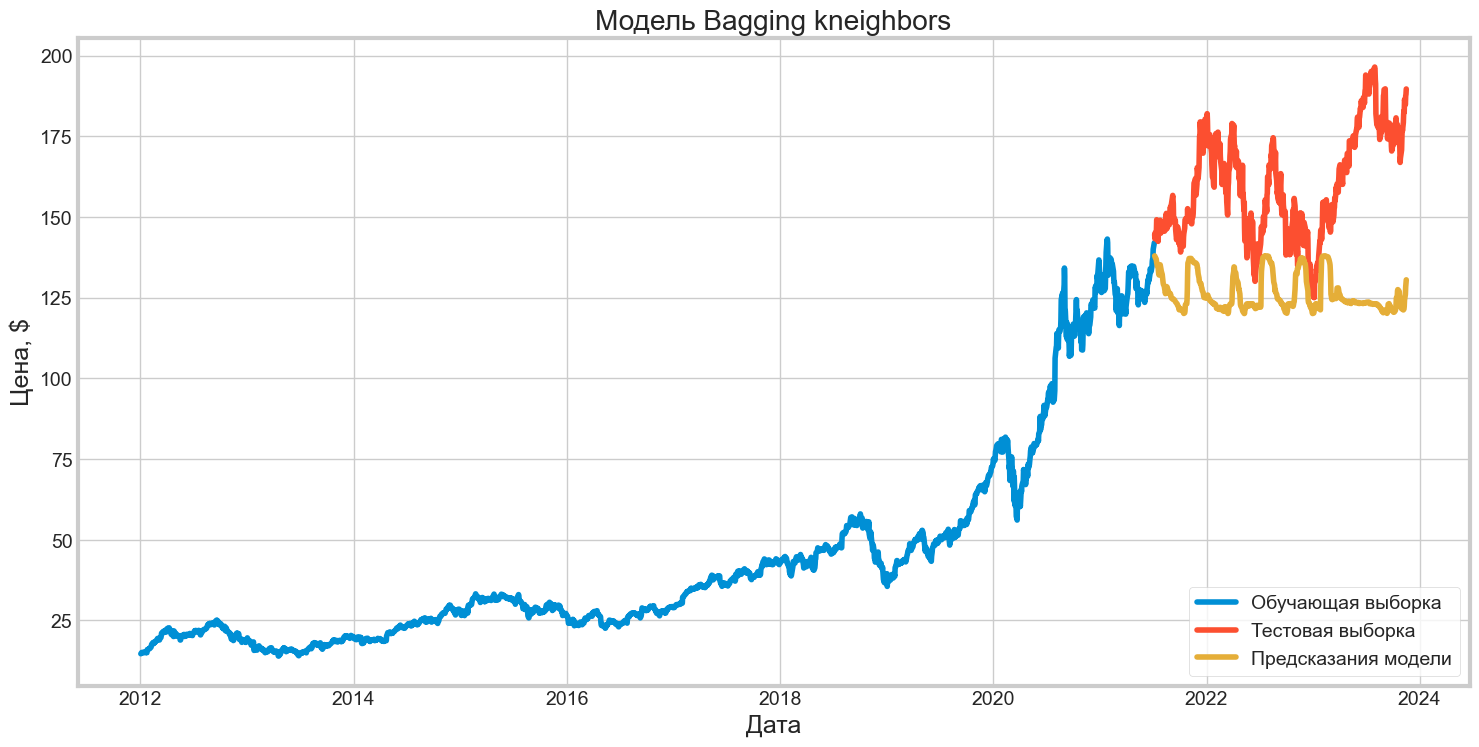

In [44]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Bagging kneighbors')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Bagging_model_3.png", bbox_inches ="tight")
plt.show()

In [45]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,137.949524
2021-07-08,143.240005,137.787784
2021-07-09,145.110001,137.420304
2021-07-12,144.500000,137.095004
2021-07-13,145.639999,136.572584
...,...,...
2023-11-10,186.399994,124.221820
2023-11-13,184.800003,125.983320
2023-11-14,187.440002,128.289041


# Stacking

In [46]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          random_state=42))

reg.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [47]:
predictions = reg.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для StackingRegressor {rmse}")

RMSE для StackingRegressor 25.08464791079118


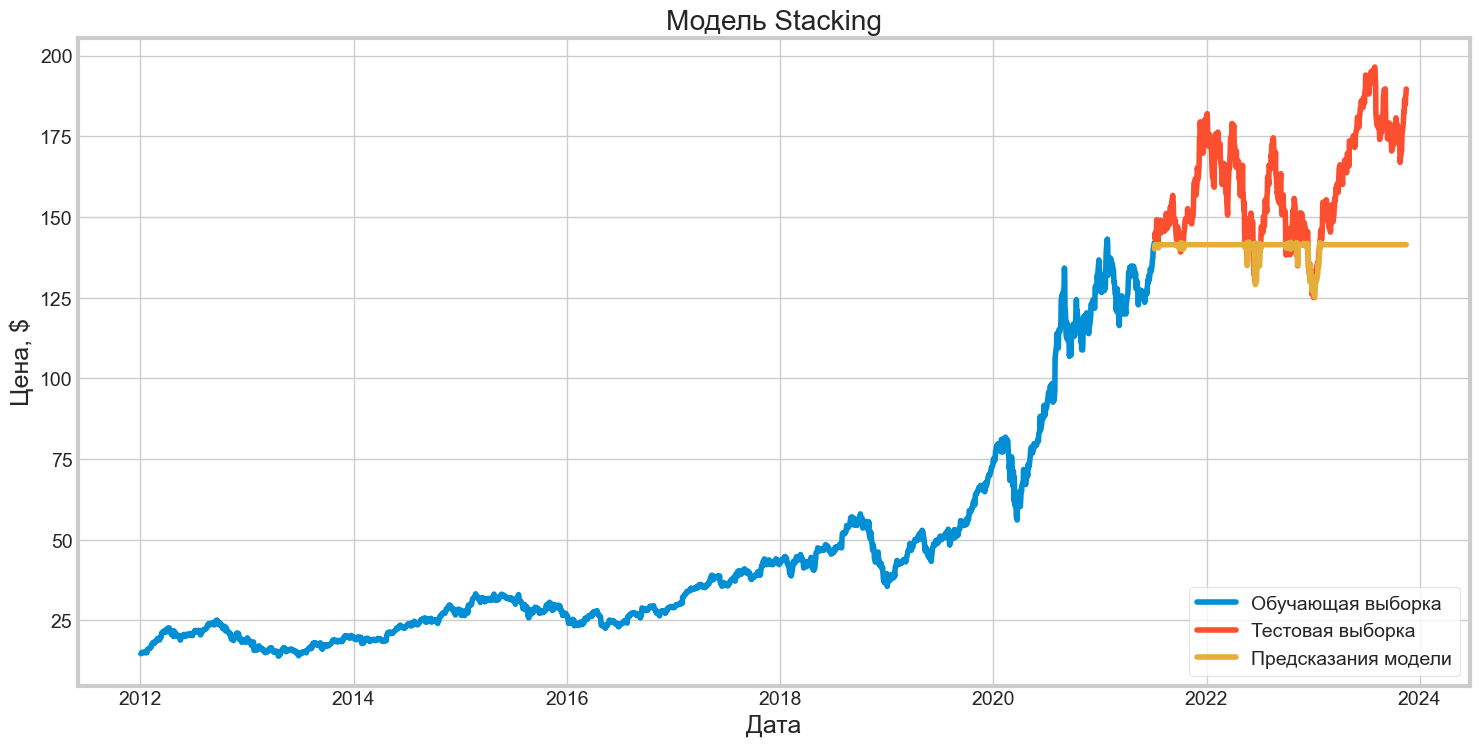

In [48]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Stacking')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Stacking_model_1.png", bbox_inches ="tight")
plt.show()

In [49]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,140.115500
2021-07-08,143.240005,141.410098
2021-07-09,145.110001,141.410098
2021-07-12,144.500000,141.410098
2021-07-13,145.639999,141.410098
...,...,...
2023-11-10,186.399994,141.410098
2023-11-13,184.800003,141.410098
2023-11-14,187.440002,141.410098


# Stacking linear

In [50]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))]
reg_linear = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression())

reg_linear.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=LinearRegression())

In [51]:
predictions = reg_linear.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для StackingRegressor {rmse}")

RMSE для StackingRegressor 22.542634393463672


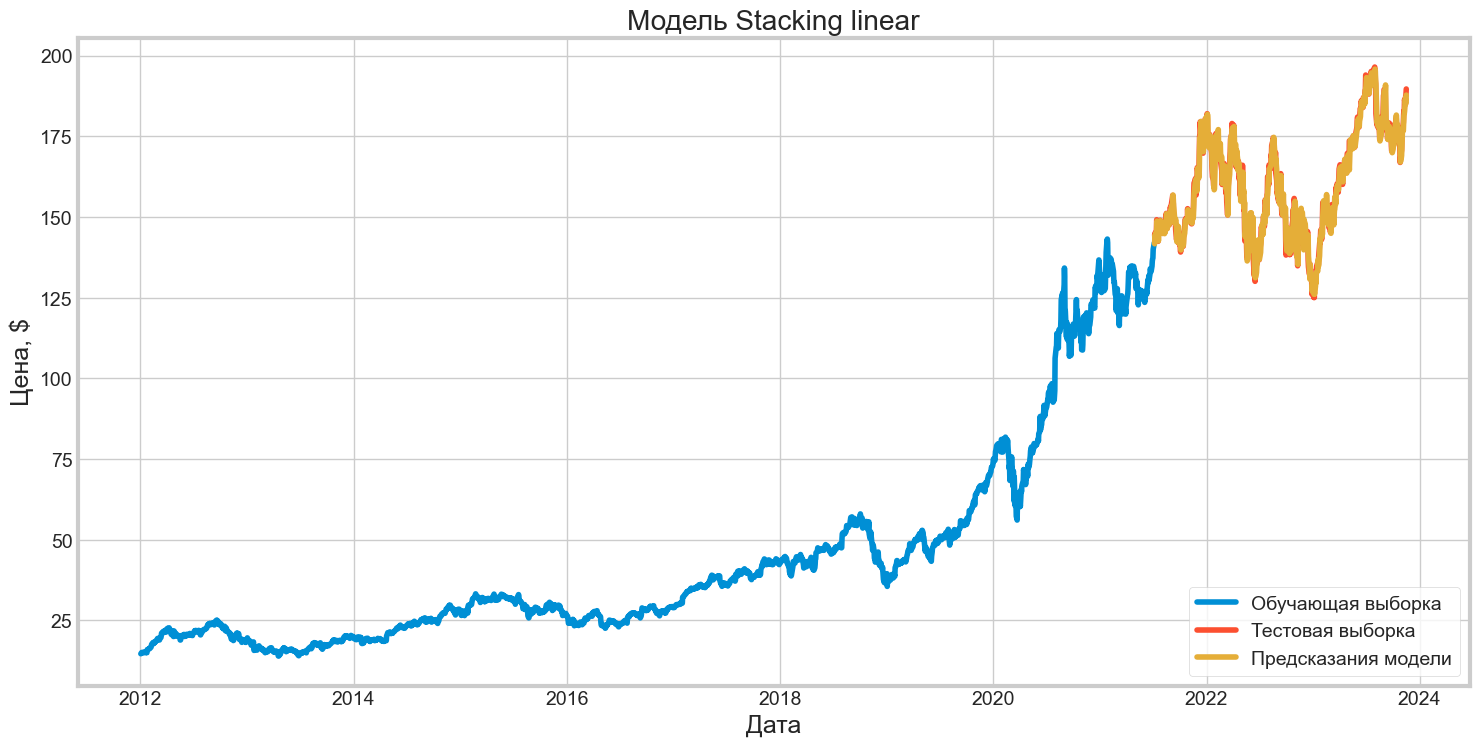

In [52]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Stacking linear')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Stacking_model_2.png", bbox_inches ="tight")
plt.show()

In [53]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,141.690800
2021-07-08,143.240005,144.342721
2021-07-09,145.110001,143.567738
2021-07-12,144.500000,145.200874
2021-07-13,145.639999,144.433005
...,...,...
2023-11-10,186.399994,182.668429
2023-11-13,184.800003,186.661453
2023-11-14,187.440002,185.082033


# Stacking kneighbors

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))]
reg_kneighbors = StackingRegressor(
    estimators=estimators,
    final_estimator=KNeighborsRegressor(n_neighbors=100))

reg_kneighbors.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=KNeighborsRegressor(n_neighbors=100))

In [55]:
predictions = reg_kneighbors.predict(x_test)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для StackingRegressor {rmse}")

RMSE для StackingRegressor 32.435090831427786


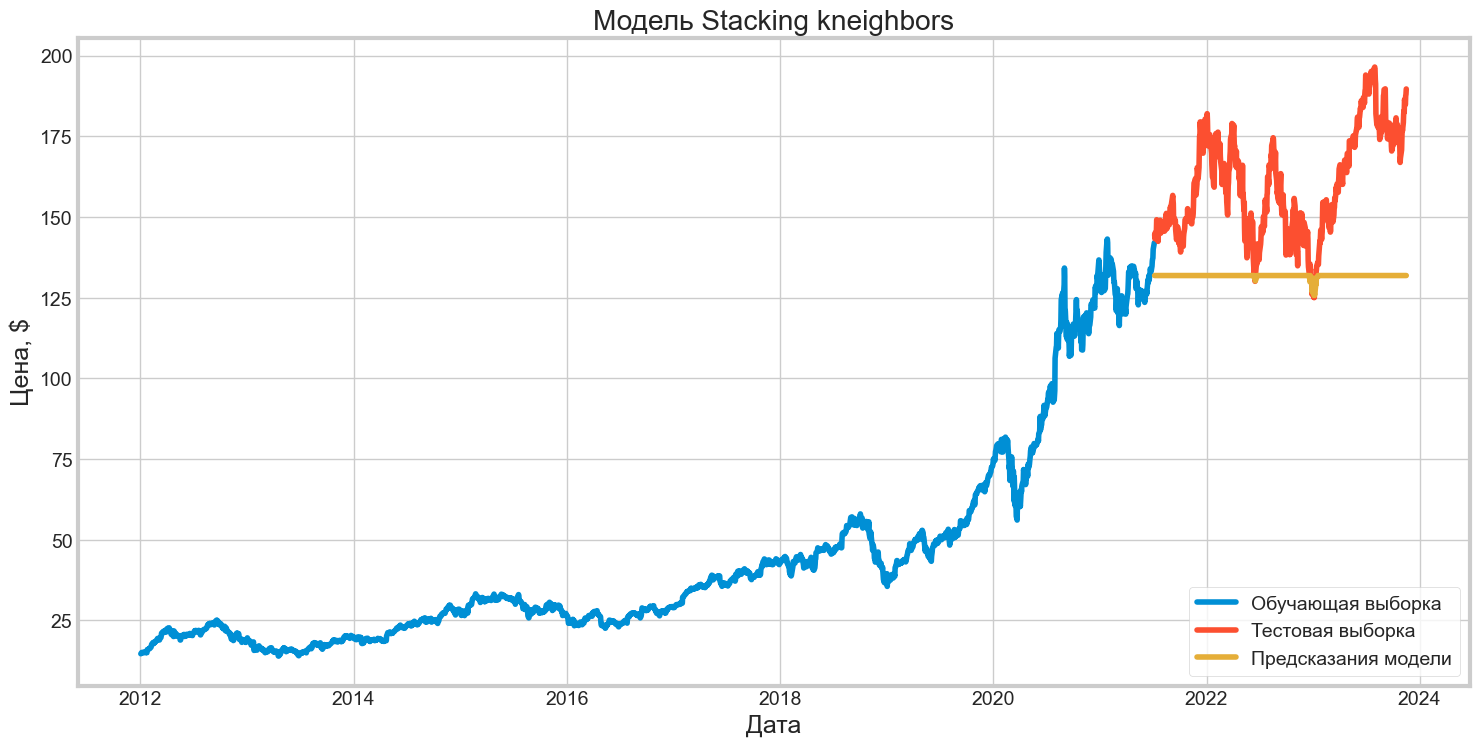

In [56]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Stacking kneighbors')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/Stacking_model_3.png", bbox_inches ="tight")
plt.show()

In [57]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,131.8551
2021-07-08,143.240005,131.8551
2021-07-09,145.110001,131.8551
2021-07-12,144.500000,131.8551
2021-07-13,145.639999,131.8551
...,...,...
2023-11-10,186.399994,131.8551
2023-11-13,184.800003,131.8551
2023-11-14,187.440002,131.8551


# Boosting

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

reg1 = GradientBoostingRegressor(random_state=0, max_depth=100, learning_rate=0.05)
reg1.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=100, random_state=0)

In [59]:
predictions = reg1.predict(x_test)

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для GradientBoostingRegressor {rmse}")

RMSE для GradientBoostingRegressor 27.391274451461964


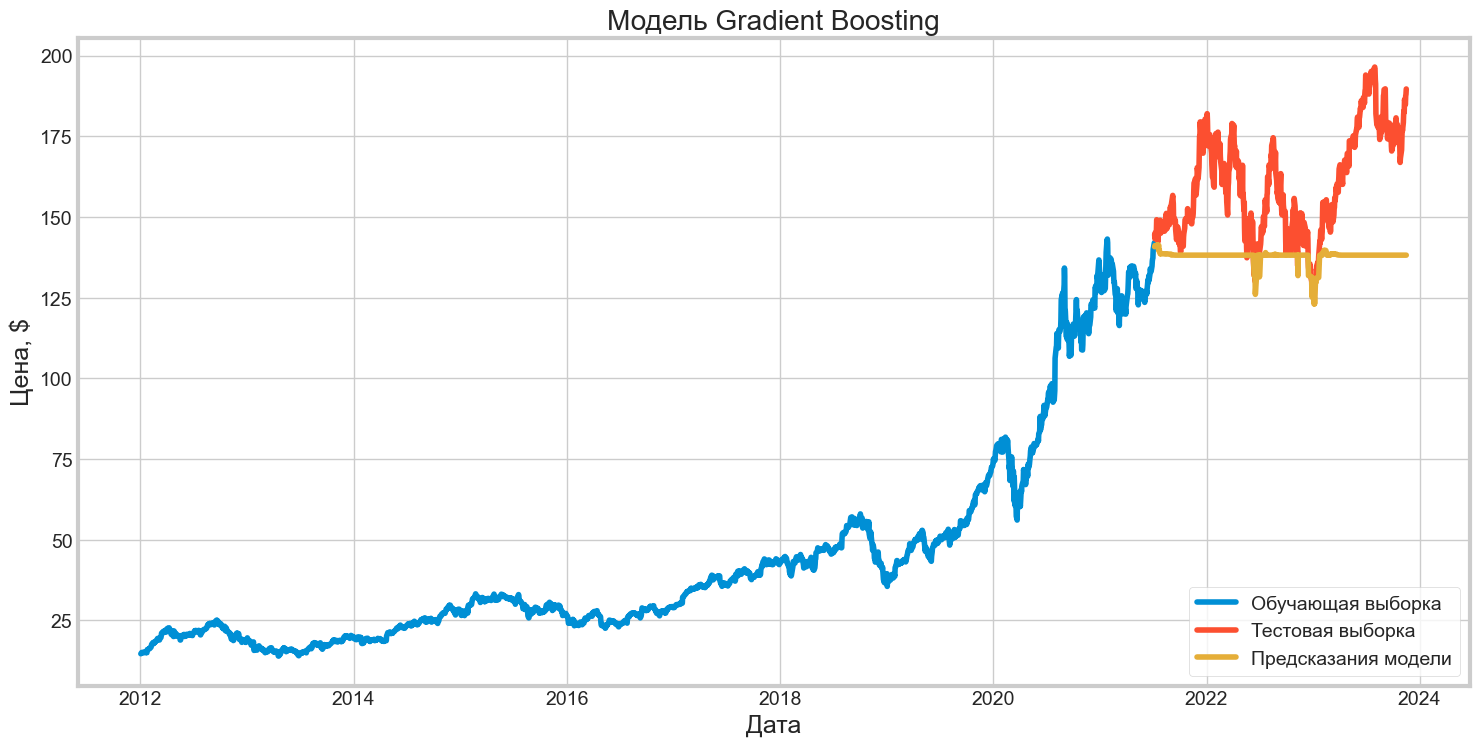

In [60]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Модель Gradient Boosting')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/GradientBoostingRegressor_model_1.png", bbox_inches ="tight")
plt.show()

In [61]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,140.784196
2021-07-08,143.240005,141.110567
2021-07-09,145.110001,140.934433
2021-07-12,144.500000,141.123730
2021-07-13,145.639999,141.038579
...,...,...
2023-11-10,186.399994,138.170299
2023-11-13,184.800003,138.170299
2023-11-14,187.440002,138.170299


### Все модели считаются экономически не эффективными так как на отложенной тестовой выборке(красная кривая) модели показывают очень плохой результат(оранжевая линия). Можно было бы поработать над улучшением гипперпараметров(hyperparameters tunning), но в данном случае это не даст особого результата.

RMSE - это просто квадратный корень из MSE. Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей.

Обычно оценка RMSE не более 180 считается хорошим баллом для умеренно или хорошо работающего алгоритма. В случае, значение RMSE превышает 180, нам необходимо выполнить выделение функций и настройки Hyper Parameter по параметрам модели.

В нашем случае наши алгоритмы не превышают 50, что означает что данные модели проявляют себя довольно неплохо в нашем случае. Но тем не менее использовать данные модели в практических целях для предсказания цены акций не стоит.

То есть чем ближе значение RMSE к нулю тем лучше, за исключением случаев переобучения модели.

# Чтобы показать действительно эффективную экономическую модель попробуем создать простую нейронную сеть LSTM.

Теперь масштабируем набор данных от 0 до 1 включительно, это необходимо, потому что обычно рекомендуется масштабировать данные, прежде чем передавать их на обучение в модель.

In [62]:
# Масштабируем набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.95063084],
       [0.95375404],
       [0.96274022]])

In [63]:
# Создание набора обучающих данных
train_data = scaled_data[0:training_data_len  , : ]
# Создаем x_train и y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [64]:
# Здесь мы преобразуем x_train и y_train в массивы numpy для быстроты работы модели
x_train, y_train = np.array(x_train), np.array(y_train)
# Выведем размерность обучающих данных
print("Train data shapes:", x_train.shape, y_train.shape)

Train data shapes: (2332, 60) (2332,)


In [65]:
# Здесь мы преобразуем данные в форму, принятую под LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# LSTM simple

In [66]:
# Если модель уже обучена, то просто загружаем её
#from keras.models import load_model
#model = load_model('Save_models/LSTM_Simple.keras')

In [67]:
# Строим нейронную сеть LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [68]:
# Выведем построенную модель
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


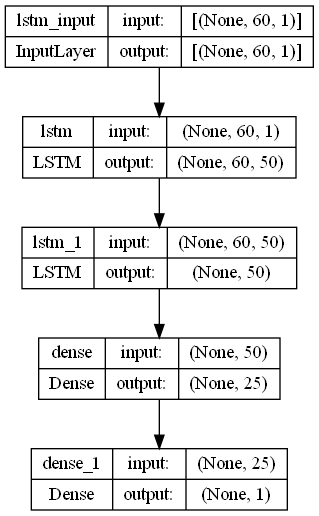

In [69]:
# Графическое представление модели
keras.utils.plot_model(model, to_file='Pictures/model_LSTM_Simple.png', show_layer_names=True, show_shapes=True)

In [70]:
# Здесь мы запускаем модель и описываем метрики
model.compile(optimizer='adam', loss='mean_squared_error')#, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [71]:
# Обучение модели
model_LSTM = model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1).history

2332/2332 [==============================] - 30s 12ms/step - loss: 6.7089e-04


In [72]:
# Тестовая выборка
test_data = scaled_data[training_data_len - 60: , : ]
# Делим на целевую переменную и предикторы
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [73]:
# Здесь мы преобразуем x_test в массив numpy
x_test = np.array(x_test)

In [74]:
# Размерность тестовых данных
print("Test data shapes:", x_test.shape, y_test.shape)

Test data shapes: (597, 60) (597, 1)


In [75]:
# Здесь мы преобразуем данные в форму, принятую под LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [76]:
# Теперь мы получаем прогнозируемые модели ценовых значений
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 7ms/step


In [77]:
# Здесь мы рассчитываем значение RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для LSTM {rmse}")

RMSE для LSTM 4.773648160133824


Из наших комментариев выше мы видим, что RMSE для LSTM равно 4.77, что есть очень хороший результат, так как данное значение довольно близко к нулю.

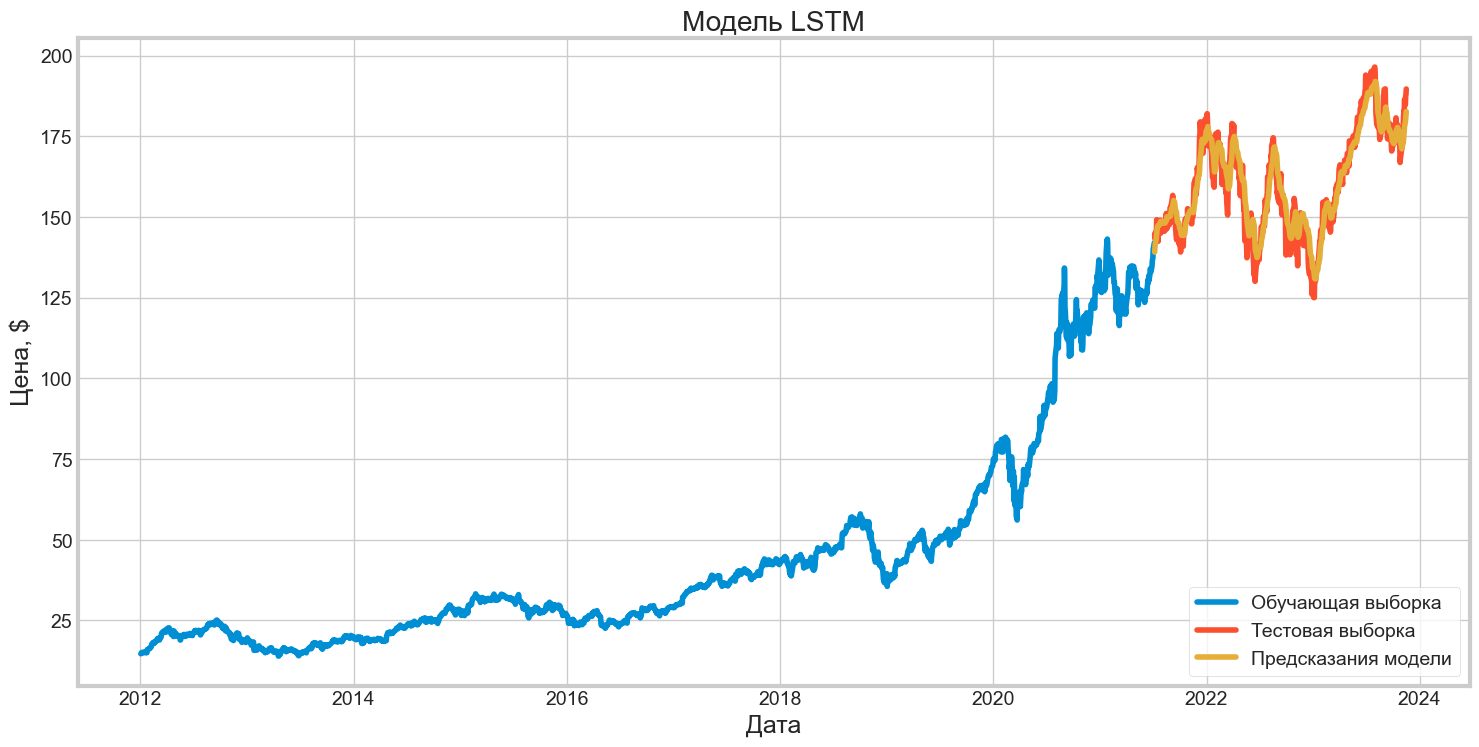

In [78]:
# Создаем и выведем данные для графика
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Визуализация данных на графике
plt.figure(figsize=(16,8))
plt.title('Модель LSTM')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/LSTM_model_Simple_predictions.png", bbox_inches ="tight")
plt.show()

In [79]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,139.129333
2021-07-08,143.240005,140.514633
2021-07-09,145.110001,141.680893
2021-07-12,144.500000,142.839462
2021-07-13,145.639999,143.771774
...,...,...
2023-11-10,186.399994,177.957794
2023-11-13,184.800003,179.344131
2023-11-14,187.440002,180.437943


In [80]:
model.save('Save_models/LSTM_Simple.keras')

# LSTM bidirectional

In [ ]:
# Если модель уже обучена, то просто загружаем её
#from keras.models import load_model
#model = load_model('Save_models/LSTM_Bidirectional.keras')

In [81]:
# Построим нейронную сеть LSTM_2 без тестовых данных с большим количеством слоев и эпох
from keras.layers import Dense, LSTM, Bidirectional, Input
model = Sequential()
model.add(Input((x_train.shape[1],1)))
model.add(Dense(units=60))
model.add(Bidirectional(LSTM(units=120, return_sequences=False, input_shape=(x_train.shape[1],1))))
model.add(Dense(units=60))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [82]:
# Выведем построенную модель
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60, 60)            120       
                                                                 
 bidirectional (Bidirectiona  (None, 240)              173760    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 60)                14460     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 188,401
Trainable params: 188,401
Non-trainable params: 0
________________________________________________

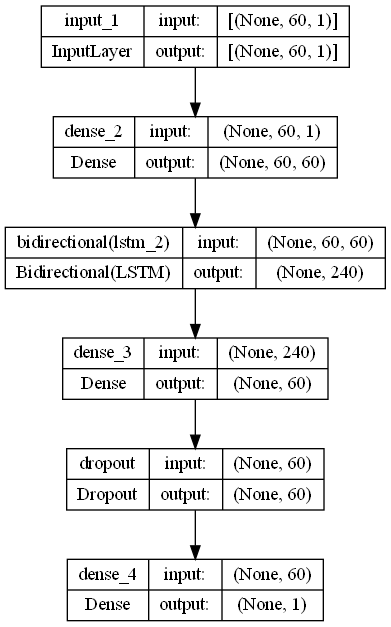

In [83]:
# Графическое представление модели
keras.utils.plot_model(model, to_file='Pictures/model_LSTM_Bidirectional.png', show_layer_names=True, show_shapes=True)

In [84]:
# Здесь мы запускаем модель и описываем метрики
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])#, metrics=['accuracy']

In [85]:
# Обучение модели
model_with_bidirectional_LSTM = model.fit(x_train, y_train, batch_size=32, epochs=18, verbose=1).history

Epoch 1/18
73/73 [==============================] - 4s 18ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 2/18
73/73 [==============================] - 1s 17ms/step - loss: 5.2289e-04 - rmse: 0.0229
Epoch 3/18
73/73 [==============================] - 1s 17ms/step - loss: 5.0655e-04 - rmse: 0.0225
Epoch 4/18
73/73 [==============================] - 1s 17ms/step - loss: 5.0873e-04 - rmse: 0.0226
Epoch 5/18
73/73 [==============================] - 1s 17ms/step - loss: 5.0169e-04 - rmse: 0.0224
Epoch 6/18
73/73 [==============================] - 1s 15ms/step - loss: 4.4327e-04 - rmse: 0.0211
Epoch 7/18
73/73 [==============================] - 1s 16ms/step - loss: 3.9958e-04 - rmse: 0.0200
Epoch 8/18
73/73 [==============================] - 1s 17ms/step - loss: 4.3024e-04 - rmse: 0.0207
Epoch 9/18
73/73 [==============================] - 1s 17ms/step - loss: 3.6617e-04 - rmse: 0.0191
Epoch 10/18
73/73 [==============================] - 1s 17ms/step - loss: 3.3520e-04 - rmse: 0.0183
Epoch 11/18
7

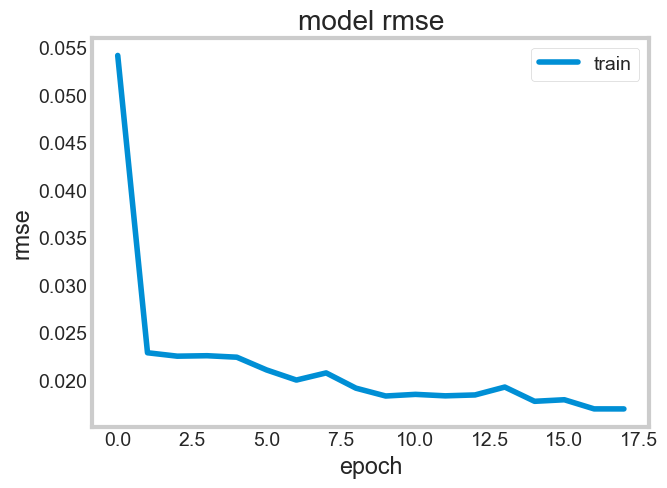

In [86]:
# Оценка модели и построение графиков
# График точности модели

plt.plot(model_with_bidirectional_LSTM['rmse'])
#plt.plot(model_with_bidirectional_LSTM['val_rmse'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');
plt.grid()
plt.savefig("Graphics/Models/LSTM_Bidirectional_Rmse.png", bbox_inches ="tight")
plt.show()

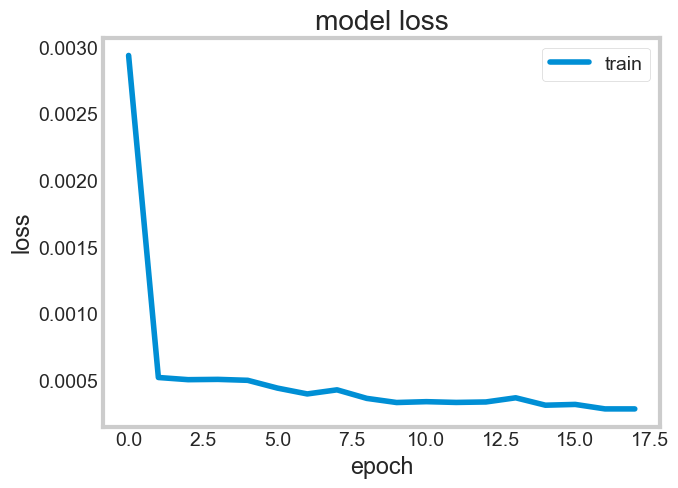

In [87]:
# График потерь

plt.plot(model_with_bidirectional_LSTM['loss'])
#plt.plot(model_with_bidirectional_LSTM['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best');
plt.grid()
plt.savefig("Graphics/Models/LSTM_Bidirectional_Loss.png", bbox_inches ="tight")
plt.show()

In [88]:
# Теперь мы получаем прогнозируемые модели ценовых значений
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 6ms/step


In [89]:
# Здесь мы рассчитываем значение RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"RMSE для LSTM {rmse}")

RMSE для LSTM 3.234898481603612


Из наших комментариев выше мы видим, что RMSE для LSTM bidirectional равно 3.23, что есть более лучший результат в сравнении с предыдущей моделью LSTM, так как данное значение довольно близко к нулю.

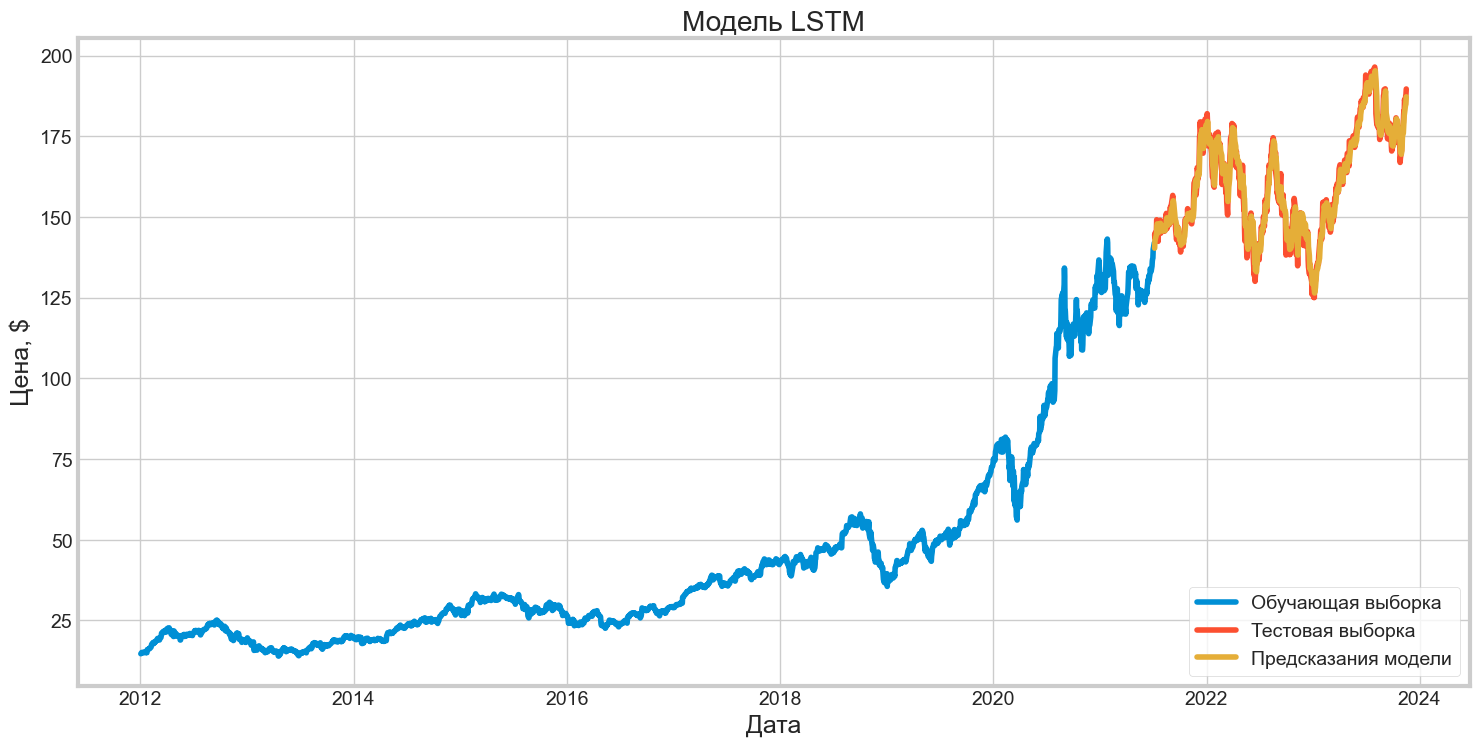

In [90]:
# Создаем и выведем данные для графика
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Визуализация данных на графике
plt.figure(figsize=(16,8))
plt.title('Модель LSTM')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена' + ', ' + price_graf_title, fontsize=18)
plt.plot(train[data_train])
plt.plot(valid[[data_train, 'Predictions']])
plt.legend(['Обучающая выборка', 'Тестовая выборка', 'Предсказания модели'], loc='lower right')
plt.savefig("Graphics/Models/LSTM_model_Bidirectional_predictions.png", bbox_inches ="tight")
plt.show()

In [91]:
# Покажем имеющиеся и предсказанные цены за выбранный период времени
valid

,Close,Predictions
Date,,
2021-07-07,144.570007,140.327759
2021-07-08,143.240005,142.507462
2021-07-09,145.110001,143.033157
2021-07-12,144.500000,144.207703
2021-07-13,145.639999,144.500809
...,...,...
2023-11-10,186.399994,182.139969
2023-11-13,184.800003,184.379272
2023-11-14,187.440002,184.741455


In [92]:
model.save('Save_models/LSTM_Bidirectional.keras')